# Weatherpy
----

## Observed Trends

Note: This data was taken during winter in the northern hemisphere.

The following has been observed in the data:

1) The majority of cities appear to have humidity levels above 60%.  This may be due to major cities tending to be located near water sources, which increase the humidity of surrounding areas.

2) The northern hemisphere has a strong negative correlation between maximum temperature and latitude, while the southern atmosphere has a positive correlation.  Temperatures trend higher closer to the equator (latitude 0) because the equator and surrounding regions receive the greatest amount of direct sunlight. The northern hemisphere is currently angled away from the sun (causing overall cooler temperatures), while the southern hemisphere is angled toward the sun (causing overall warmer temperatures).

3) The other attributes analyzed (humidity, cloudiness, and wind speed) had fairly weak correlations to latitude. This is likely because those three attributes have various other presiding factors, such as altitude and topography. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities from citipy
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
print(f" There are {city_count} cities in the list.")

 There are 635 cities in the list.


## Perform API Calls

In [3]:
#Gather weather data from openweathermap api and fill the appropriate lists
weatherCities = []
lat = []
lon = []
temp = []
hum = []
cloud = []
wspeed = []
country = []
edate = []

#Set up the url information
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        weatherCities.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"]) #the starter code refers to "Max Temp", not "Temp"
        hum.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wspeed.append(response["wind"]["speed"])
        edate.append(response["dt"])
        
        index = cities.index(city)
        print(f"Processing record {index + 1} of {city_count} | {city}") 
        
    except (KeyError, IndexError): 
        print(f"City {city} not found. Skipping City.")
        pass

Processing record 1 of 635 | mahibadhoo
Processing record 2 of 635 | marawi
City grand river south east not found. Skipping City.
City sentyabrskiy not found. Skipping City.
Processing record 5 of 635 | dongsheng
Processing record 6 of 635 | thompson
City taolanaro not found. Skipping City.
Processing record 8 of 635 | taltal
Processing record 9 of 635 | lagos
Processing record 10 of 635 | kapaa
Processing record 11 of 635 | buin
Processing record 12 of 635 | sao joao da barra
Processing record 13 of 635 | sirjan
Processing record 14 of 635 | new norfolk
Processing record 15 of 635 | barrow
Processing record 16 of 635 | lagoa
Processing record 17 of 635 | kapuskasing
Processing record 18 of 635 | ostrovnoy
Processing record 19 of 635 | castro
Processing record 20 of 635 | cape town
Processing record 21 of 635 | punta arenas
Processing record 22 of 635 | vanavara
Processing record 23 of 635 | burnie
Processing record 24 of 635 | mana
Processing record 25 of 635 | abashiri
Processing rec

## Convert Raw Data to DataFrame

In [4]:
#Create the dictionary of weather information for each city, and then convert to data frame and display    
weather_dict = {
    "City": weatherCities,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp (F)": temp,
    "Humidity (%)": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wspeed,
    "Date": edate
}
#Save the city weather data as a data frame
weather_data = pd.DataFrame(weather_dict)

In [13]:
#Clean the data frame by removing any entries with humidity levels over 100%
weather_data_cl = weather_data[weather_data["Humidity (%)"] <= 100]
weather_data_cl.index.name = "City ID"

#Store the first date to label all the plots
start_time = weather_data_cl["Date"].iloc[0]
date = time.strftime('%m-%d-%Y', time.localtime(start_time))

#Convert epoch time into CST
weather_data_cl["Date"] = pd.to_datetime(weather_data_cl["Date"], unit='s', utc=True).dt.tz_convert('US/Central')

#Save the city weather data as a csv
weather_data_cl.to_csv("output_data/cities.csv", sep=',', encoding='utf-8')

weather_data_html = weather_data_cl.copy()
weather_data_html.reset_index(inplace = True, drop = True)
weather_data_html.to_html("output_data_march/weather_data.html")

#Display the cleaned and formatted data frame
weather_data_html.head(50)

,City,Country,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Mahibadhoo,MV,3.7833,72.9667,82.40,74,93,8.81,2022-03-16 16:48:57-05:00
1,Marawi,PH,7.9986,124.2928,68.14,93,97,2.10,2022-03-16 16:48:58-05:00
2,Dongsheng,CN,39.8161,109.9776,33.53,58,100,11.12,2022-03-16 16:48:59-05:00
3,Thompson,CA,55.7435,-97.8558,24.96,58,75,4.61,2022-03-16 16:46:40-05:00
4,Taltal,CL,-25.4000,-70.4833,69.19,77,58,4.38,2022-03-16 16:48:59-05:00
5,Lagos,NG,6.5833,3.7500,81.86,81,50,6.04,2022-03-16 16:47:45-05:00
6,Kapaa,US,22.0752,-159.3190,80.92,74,40,9.22,2022-03-16 16:49:00-05:00
7,Buin,CL,-33.7333,-70.7500,79.12,44,0,9.42,2022-03-16 16:49:01-05:00
8,São João da Barra,BR,-21.6403,-41.0511,84.29,82,0,17.69,2022-03-16 16:49:02-05:00
9,Sīrjān,IR,29.4520,55.6814,58.21,30,0,11.07,2022-03-16 16:49:02-05:00


## Plotting the Data

In [6]:
#Define a function that will create a scatter plot and save it
def scattered(xlabel, ylabel, lat_range, date, savename):
    plt.figure()
    plt.scatter(weather_data_cl[xlabel], weather_data_cl[ylabel], marker = "o", facecolors="skyblue", edgecolors="black")
    plt.grid()
    plt.xlabel(xlabel)
    plt.xlim(lat_range[0], lat_range[1])
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs {xlabel} ({date})")
    
    #Save the figure
    plt.savefig("output_data_march/"+ savename, bbox_inches='tight')
    
    #Display the figure
    plt.show()    

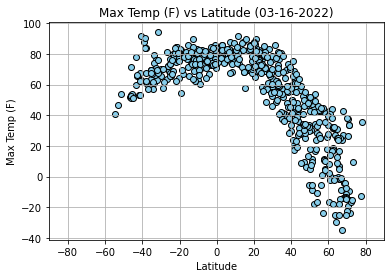

 The plot above is analysing the relationship between Max Temp (F) and Latitude.
 Based on the plot, there does appear to be a relationship between Max Temp (F) and Latitude.


In [7]:
# Temperature (F) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "MaxTvsLat.svg"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

print(f" The plot above is analysing the relationship between {ylabel} and {xlabel}.")
print(f" Based on the plot, there does appear to be a relationship between Max Temp (F) and Latitude.")

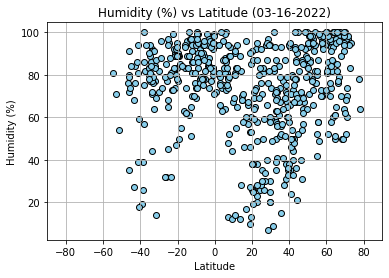

 The plot above is analysing the relationship between Humidity (%) and Latitude.
 Based on the plot, many of the cities found tend to have higher (greater than 60%) humidity.
 This may be due to most major cities being located near water sources.


In [8]:
# Humidity (%) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "HumVsLat.svg"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

print(f" The plot above is analysing the relationship between {ylabel} and {xlabel}.")
print(f" Based on the plot, many of the cities found tend to have higher (greater than 60%) humidity.")
print(f" This may be due to most major cities being located near water sources.")

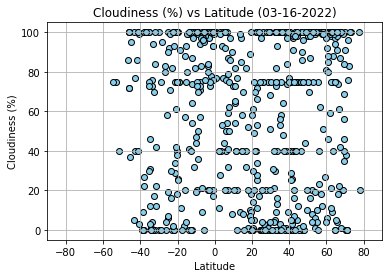

 The plot above is analysing the relationship between Cloudiness (%) and Latitude.
 Based on the plot, the relationship between Cloudiness (%) and Latitude is likely weak.


In [9]:
# Cloudiness (%) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
savename = "CloudVsLat.svg"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

print(f" The plot above is analysing the relationship between {ylabel} and {xlabel}.")
print(f" Based on the plot, the relationship between Cloudiness (%) and Latitude is likely weak.")

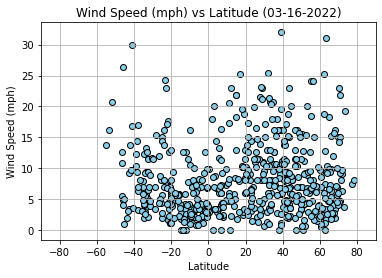

 The plot above is analysing the relationship between Wind Speed (mph) and Latitude.
 Based on the plot, the relationship between Wind Speed (mph) and Latitude is likely weak.


In [10]:
# Wind Speed (mph) vs. Latitude

#Define plot specific information
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
savename = "WSpdVsLat.svg"

#Call on the user-defined scattered function
scattered(xlabel, ylabel, lat_range, date, savename)

print(f" The plot above is analysing the relationship between {ylabel} and {xlabel}.")
print(f" Based on the plot, the relationship between Wind Speed (mph) and Latitude is likely weak.")

## Linear Regression

In [11]:
#Create separate data frames for the northern and southern hemispheres
north_weather_data = weather_data_cl[weather_data_cl["Latitude"] >= 0]
south_weather_data = weather_data_cl[weather_data_cl["Latitude"] < 0]

#Create a data frame for the xlim values for the scatter plots below
xaxis = pd.DataFrame({"Northern": (0, 80), "Southern": (-60, 0)})

In [12]:
#Define a function that will output the r-value, scatter plot, linear regression line, and linear regression equation

def linreg(hemisphere, xlabel, ylabel, annoloc, savename, date):

    if hemisphere == "Northern":
        xvalues = north_weather_data[xlabel]
        yvalues = north_weather_data[ylabel]
    else:     
        xvalues = south_weather_data[xlabel]
        yvalues = south_weather_data[ylabel]
        
    #Format the scatter plot
    plt.figure()
    plt.title(f"{hemisphere} Hemisphere: {ylabel} vs {xlabel} ({date})")
    xlim = xaxis[hemisphere] #pull the xlim values from a data frame
    plt.xlim(xlim)
    plt.scatter(xvalues, yvalues, marker = "o", facecolors="skyblue", edgecolors="black")
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #Calculate everything needed for the linear regression line
    (slope, intercept, rvalue, pvalue, stdder) = linregress(xvalues, yvalues)
    line = slope * xvalues + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Format the linear regression line plot
    plt.plot(xvalues, line, color = "red")
    plt.annotate(line_eq, annoloc, fontsize = 15, color = "red")

    #Save the figure
    plt.savefig("output_data/"+ savename)
        
    #Show r-value and the plot
    print(f"The r-value is {round(rvalue, 4)}")
    plt.show();

The r-value is -0.8476


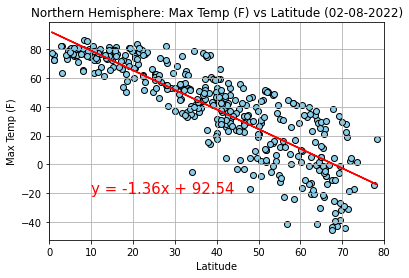

In [13]:
# Northern Hemisphere - Temperature (F) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "N_MaxTvsLat"
annoloc = (10,-20)   #annotation location for the linear regression equation

#Call on the user-defined linreg function
linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

In the northern hemisphere (which is currently in winter), there is currently a fairly strong negative correlation between Max Temp (F) and Latitude. 

Temperatures are higher near the equator (Latitude 0), owing to higher levels of direct sunlight.

Temperatures at higher latitudes are lower to due to experiencing less direct sunlight, as the northern hemisphere is currently tilted away from the sun, causing more of the suns heat to reflect off of the atmosphere.

The r-value is 0.3671


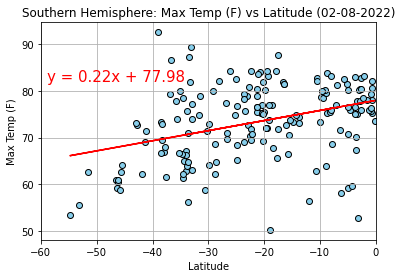

In [23]:
#Southern Hemisphere - Temperature (F) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Max Temp (F)"
savename = "S_MaxTvsLat"
annoloc = (-59,82)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

In the southern hemisphere (which is currently in summer), there is currently a weak positive correlation between Max Temp (F) and Latitude. 

Temperatures are higher near the equator (Latitude 0), owing to higher levels of direct sunlight.

The r-value is 0.3857


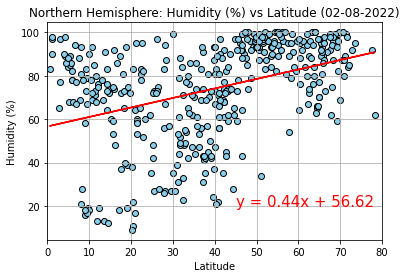

In [24]:
#Northern Hemisphere - Humidity (%) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "N_HumVsLat"
annoloc = (45,20)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

In the northern hemisphere, there is a weak positive correlation between humidity and latitude.

The r-value is 0.4392


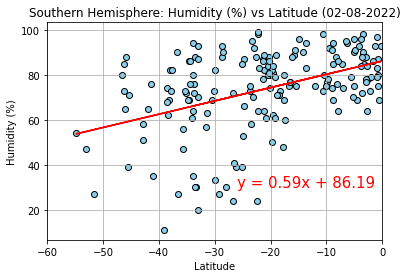

In [28]:
#Southern Hemisphere - Humidity (%) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Humidity (%)"
savename = "S_HumVsLat"
annoloc = (-26,30)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

In the southern hemispere, there is a weak positive correlation between humidity and latitude.

The r-value is 0.2448


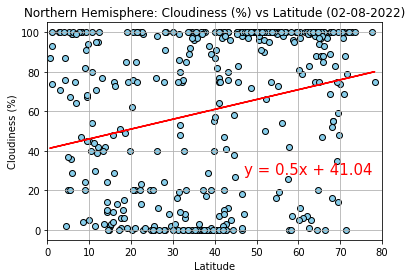

In [30]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
savename = "N_CloudVsLat"
annoloc = (47,28)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

In the northern hemisphere, there is a very weak positive correlation between cloudiness and latitude.

The r-value is 0.2785


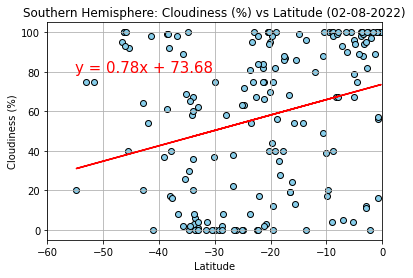

In [32]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
savename = "S_CloudVsLat"
annoloc = (-55,80)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

In the southern hemisphere, there is a very weak positive correlation between cloudiness and latitude.

The r-value is 0.2283


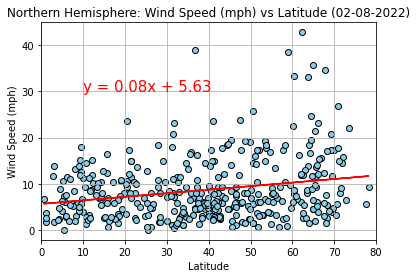

In [33]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude

#Define plot specific information
hemisphere = "Northern"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
savename = "N_WSpdVsLat"
annoloc = (10,30)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

In the northern hemisphere, there is a very weak positive correlation between wind speed and latitude.

The r-value is -0.1168


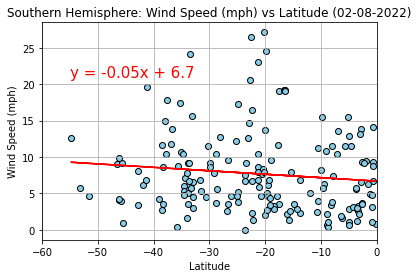

In [35]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

#Define plot specific information
hemisphere = "Southern"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
savename = "S_WSpdVsLat"
annoloc = (-55, 21)   #annotation location for the linear regression equation

linreg(hemisphere, xlabel, ylabel, annoloc, savename, date)

In the southern hemisphere, there is a very weak (possibly non-existent) negative correlation between wind speed and latitude.